In [69]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("clean_full.csv")

In [5]:
df.head()

,paper_id,title,authors,abstract,body_text
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""Multi-faceted"" COVID-19: Russian experience",None,None,According to current live statistics at the t...
1,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,"['E Cornelissen', 'H Dewerchin', 'E Hamme', 'H...",['Feline infectious peritonitis virus (FIPV) p...,Feline infectious peritonitis FIP is a fatal ...
2,00033d5a12240a8684cfe943954132b43434cf48,Detection of Severe Acute Respiratory Syndrome...,"['Petra Wandernoth', 'Katharina Kriegsmann', '...",['Background: Amplification of viral ribonucle...,Severe acute respiratory syndrome coronavirus...
3,0003793cf9e709bc2b9d0c8111186f78fb73fc04,Title: Rethinking high-risk groups in COVID-19,"['Anastasia Vishnevetsky', 'Michael Levy']",None,How do we protect our high risk patient popul...
4,000379d7a7f37a2ccb978862b9f2016bd03259ea,ScienceDirect ScienceDirect Effect of Nanomate...,"['Harish Devaraj', 'Rajiv Malhotra']",['approach. The NM shape in the conformal circ...,Integration of functional electronic devices ...


In [12]:
df = df.drop(["title", "authors", "abstract"], axis = 1)

In [19]:
df1 = df.sample(frac=0.20, random_state=1)

In [20]:
df1.shape

(25783, 2)

In [21]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=9239d4d660bcfd2d395315e8d0fa17c56ba66abb333401e2c85ecae2bd956c20
  Stored in directory: C:\Users\abhil\AppData\Local\Temp\pip-ephem-wheel-cache-u6ryx9in\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [25]:
import spacy
#nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()

In [35]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

In [41]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's scjsk.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'scjsk']


In [62]:
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))
stop_words_nltk.update([
    'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon',
    'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri',
    'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon',
    'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi',
    'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon',
    'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas',
    'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim',
    'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor',
    'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea',
    'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv', "'d", "'s", 'anywh',
    'could', 'doe', 'el', 'elsewh', 'everywh', 'ind', 'might', 'must', "n't",
    'need', 'otherwi', 'plea', 'sha', 'somewh', 'wo', 'would'
])

In [63]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=None,
                                 min_df=0.2, stop_words=stop_words_nltk,
                                 use_idf=True,smooth_idf=1,sublinear_tf=1, tokenizer= tokenize_and_stem,
                                 ngram_range=(1,3),lowercase=True)

In [65]:
t_matrix = tfidf_vectorizer.fit_transform(tqdm([x for x in df1["body_text"]]))

100%|████████████████████████████████████████████████████████████████████████████| 25783/25783 [32:58<00:00, 13.03it/s]


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=1)
X_pca= pca.fit_transform(t_matrix.toarray())
X_pca.shape

(25783, 644)

In [67]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN

In [68]:
import timeit

start = timeit.default_timer()
# Run Kmeans for a batch of cluster to find optimal k
distortions = {}
for k in tqdm(np.arange(1, 50, 2)):
    km = KMeans(n_clusters=k, max_iter=1000).fit(X_pca)
    distortions[k] = km.inertia_
    
stop = timeit.default_timer()
print('Time: ', stop - start)

plt.figure(figsize = (15, 7))
plt.plot(list(distortions.keys()), list(distortions.values()))
plt.xlabel("Number of clusters")
plt.xticks(np.arange(1, 50, 2))
plt.ylabel("Distortions")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [09:20<00:00, 22.41s/it]


Time:  560.1479392000001


NameError: name 'plt' is not defined

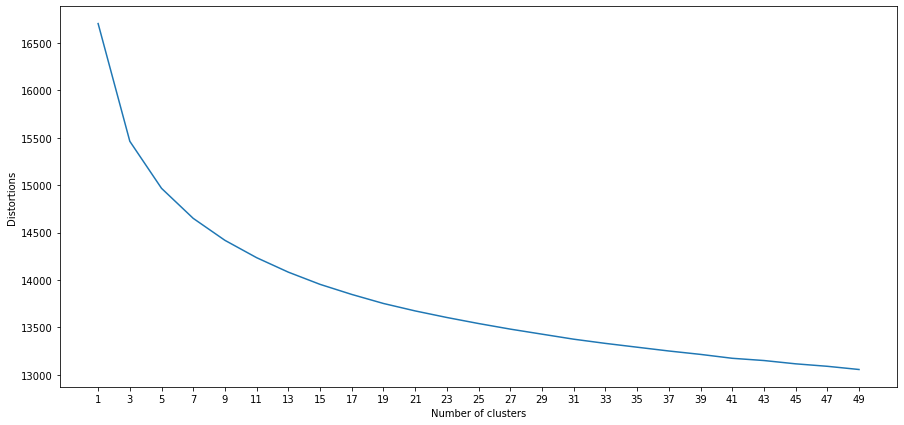

In [70]:
plt.figure(figsize = (15, 7))
plt.plot(list(distortions.keys()), list(distortions.values()))
plt.xlabel("Number of clusters")
plt.xticks(np.arange(1, 50, 2))
plt.ylabel("Distortions")
plt.show()

In [71]:
km_final = KMeans(n_clusters = 15, random_state = 1).fit(X_pca)
cluster_labels = km_final.labels_
cluster_centers = km_final.cluster_centers_


In [ ]:
plt.figure(figsize=(12,10))
ptl.scatter(X_pca[0],X_pca[1],s=1)

<AxesSubplot:>

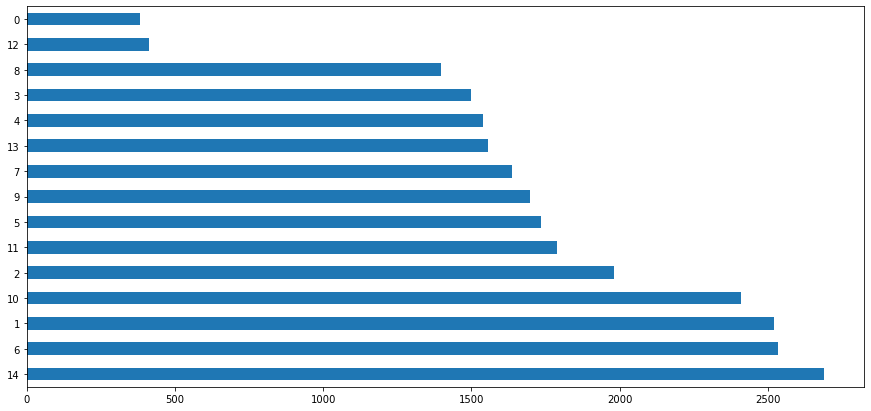

In [102]:
plt.figure(figsize = (15, 7))
pd.Series(cluster_labels).value_counts().plot(kind = 'barh')

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=1)
X_tsne = tsne.fit_transform(t_matrix.toarray())